# <center><div style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #FFFFFF; text-align: center; line-height: 0.55;background-color: purple"><b>Customer Spending ( EDA & Pred )</b><br>

#  <center><div style="font-family: Trebuchet MS; background-color: PURPLE; color: #FFFFFF; padding: 12px; line-height: 1;">Dataset Information</div></center>

In this notebook, I will be creating a model to predict one's salary from a few features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_data.csv')
df.head()

,name,age,gender,education,income,country,purchase_frequency,spending
0,Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
1,Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
2,Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
3,Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
4,Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780


In [3]:
# Drop name and country
df.duplicated().sum()

0

Correlation

/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_865/841934656.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

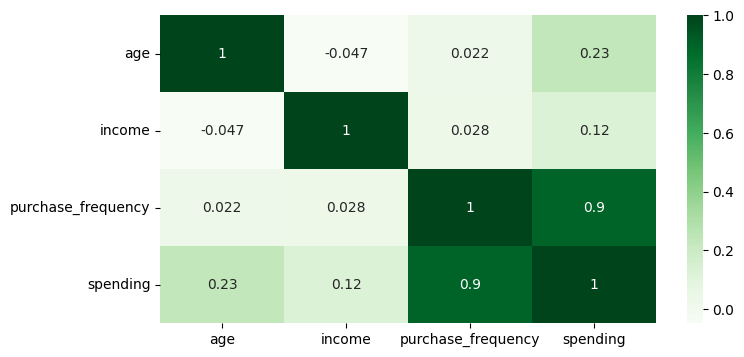

In [4]:
corr = df.corr()

plt.figure(figsize=(8,4))
sns.heatmap(corr, cmap="Greens", annot=True)

/var/folders/wg/bqtpsjds1p16_p2clkzkw5d80000gn/T/ipykernel_865/1262712417.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corrwith(df['spending']).sort_values(ascending = False).to_frame()


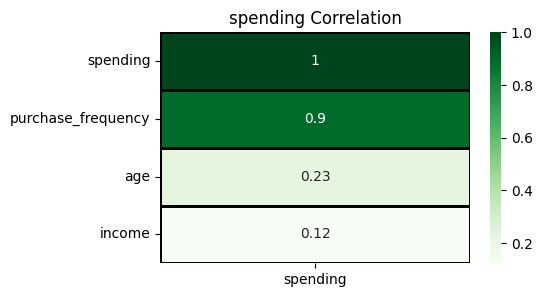

In [5]:
corr = df.corrwith(df['spending']).sort_values(ascending = False).to_frame()
corr.columns = ['spending']

plt.subplots(figsize = (5,3))
sns.heatmap(corr, annot=True ,cmap = 'Greens',linewidths =1,linecolor = 'black');

plt.title('spending Correlation');

Clearly, features like name and country have little impact

#  <center><div style="font-family: Trebuchet MS; background-color: PURPLE; color: #FFFFFF; padding: 12px; line-height: 1;">Model</div></center>

In [14]:
!pip install pycaret

  Using cached pycaret-3.0.2-py3-none-any.whl (483 kB)
  Using cached ipywidgets-8.0.6-py3-none-any.whl (138 kB)
  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
  Using cached category_encoders-2.6.1-py2.py3-none-any.whl (81 kB)
  Using cached lightgbm-3.3.5.tar.gz (1.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached deprecation-2.1.0-py2.py3-none-any.whl (11 kB)
  Using cached kaleido-0.2.1-py2.py3-none-macosx_11_0_arm64.whl (85.8 MB)


  Using cached wheel-0.40.0-py3-none-any.whl (64 kB)


  error: subprocess-exited-with-error
  
  × Building wheel for lightgbm (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [85 lines of output]
      INFO:root:running bdist_wheel
      INFO:root:running build
      INFO:root:running build_py
      INFO:root:creating build
      INFO:root:creating build/lib
      INFO:root:creating build/lib/lightgbm
      INFO:root:copying lightgbm/callback.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/compat.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/plotting.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/__init__.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/engine.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/dask.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/basic.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/libpath.py -> build/lib/lightgbm
      INFO:root:copying lightgbm/sklearn.py -> build/lib/lightgbm
      INFO:root:running egg_info
      IN

In [16]:
from pycaret.regression import *
s = setup(data=df, target='spending', session_id=123, normalize=True,fold = 5, remove_outliers = True)

ModuleNotFoundError: No module named 'pycaret'

In [ ]:
best=compare_models()

In [ ]:
tuned_model=tune_model(best, n_iter = 100)